In [1]:
import os
import glob
import uproot
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
from scipy.optimize import curve_fit
import mplhep as hep
plt.style.use(hep.style.CMS)
#import yahist
from tqdm import tqdm
pd.set_option('display.max_columns', None)
from tqdm import tqdm
pd.set_option('display.max_rows', 500)

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [2]:
# import matplotlib
# matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['font.size']=18

# matplotlib.rcParams["xtick.labelsize"]=16 #16
# matplotlib.rcParams["ytick.labelsize"]=16 #16
# matplotlib.rcParams["legend.fontsize"]=16 #12,20
# matplotlib.rcParams['legend.title_fontsize'] = 17
# matplotlib.rcParams["axes.labelsize"]=20 #20
# matplotlib.rcParams["font.weight"]=1000
# matplotlib.rcParams["lines.linewidth"]=2
# matplotlib.rcParams.update({'figure.autolayout': True})
# matplotlib.rcParams['figure.dpi'] = 80
# matplotlib.rcParams['savefig.dpi'] = 1200
# plt.rcParams['figure.figsize'] = [6.0, 6.0]

# #matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
# #matplotlib.rcParams['text.usetex'] = False
# matplotlib.rcParams["legend.framealpha"]=0 #12,20
# matplotlib.rcParams["legend.fancybox"]=False
# plt.rcParams['figure.facecolor']='white'
# plt.rcParams['savefig.facecolor']='white'

In [3]:
filename = "fixedareasn_May22"#"aged" #"startup" #"aged"
simType = "@ Fixed area (S/N)" #"Startup" #"EOL" 

inputDir = '/afs/cern.ch/work/m/mmazza/private/projects/HGCElectronicsValidation/CMSSW_14_1_0_pre1/src/UserCode/HGCElectronicsValidation/'
plot_dir = inputDir+"/plots/"+filename+"/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)    
infile = inputDir+filename+'.root'

In [4]:
tileboards=[[34,'J8',1,18,25,1,False], 
            [34,'K4',1,26,29,2,True], 
            [35,'J8',1,18,25,3,False], 
            [35,'K6',1,26,31,4,True], 
            [36,'J8',1,18,25,1,False], 
            [36,'K7',1,26,33,2,True],
            [37,'J8',1,18,25,3,False],
            [37,'K7',1,26,33,4,True],
            [38,'C5',1,13,17,1,False],
            [38,'D8',1,18,25,2,False],
            [38,'E8',1,26,33,3,False],
            [38,'G3',1,34,37,4,True],
            [39,'C5',1,13,17,1,False],
            [39,'D8',1,18,25,2,False],
            [39,'E8',1,26,33,3,False],
            [39,'G4',1,34,39,4,True],
            [40,'B11B12',2,6,17,1,False],
            [40,'D8',1,18,25,2,False],
            [40,'E8',1,26,33,3,False],
            [40,'G8',1,34,41,4,True],
            [41,'B11B12',2,6,17,1,False],
            [41,'D8',1,18,25,2,False],
            [41,'E8',1,26,33,3,False],
            [41,'G8',1,34,41,4,True],
            [42,'B11B12',2,6,17,1,False],
            [42,'D8',1,18,25,2,False],
            [42,'E8',1,26,33,3,False],
            [42,'G8',1,34,41,4,True],
            [43,'B11B12',2,6,17,1,False],
            [43,'D8',1,18,25,2,False],
            [43,'E8',1,26,33,3,False],
            [43,'G8',1,34,41,4,True],            
            [44,'A5A6',1,0,5,1,False],
            [44,'B12',2,6,17,2,False],
            [44,'D8',1,18,25,3,False],
            [44,'E8',1,26,33,4,False],
            [44,'G8',1,34,41,5,True],           
            [45,'A5A6',1,0,5,1,False],
            [45,'B12',2,6,17,2,False],
            [45,'D8',1,18,25,3,False],
            [45,'E8',1,26,33,4,False],
            [45,'G8',1,34,41,5,True],
            [46,'A5A6',1,0,5,1,False],
            [46,'B12',2,6,17,2,False],
            [46,'D8',1,18,25,3,False],
            [46,'E8',1,26,33,4,False],
            [46,'G8',1,34,41,5,True],
            [47,'A5A6',1,0,5,1,False],
            [47,'B12',2,6,17,2,False],
            [47,'D8',1,18,25,3,False],
            [47,'E8',1,26,33,4,False],
            [47,'G6',1,34,39,5,True],
           ]

# Build histogram from TTree of individual TileBoards

In [5]:
with uproot.open(infile) as f:    
    df_tree = f["ana/Events"].arrays(library="pd")
    df_info = f["ana/Info"].arrays(library="pd")

In [6]:
df_info_div36 = df_info.copy(deep=True)
df_info_div36 = df_info_div36/36 # tileboards per 360deg 
#df_info_div36/288 # ids per cell
df_info_div36

,L34_J8_validDetIds,L34_K4_validDetIds,L35_J8_validDetIds,L35_K6_validDetIds,L36_J8_validDetIds,L36_K7_validDetIds,L37_J8_validDetIds,L37_K7_validDetIds,L38_C5_validDetIds,L38_D8_validDetIds,L38_E8_validDetIds,L38_G3_validDetIds,L39_C5_validDetIds,L39_D8_validDetIds,L39_E8_validDetIds,L39_G4_validDetIds,L40_B11B12_validDetIds,L40_D8_validDetIds,L40_E8_validDetIds,L40_G8_validDetIds,L41_B11B12_validDetIds,L41_D8_validDetIds,L41_E8_validDetIds,L41_G8_validDetIds,L42_B11B12_validDetIds,L42_D8_validDetIds,L42_E8_validDetIds,L42_G8_validDetIds,L43_B11B12_validDetIds,L43_D8_validDetIds,L43_E8_validDetIds,L43_G8_validDetIds,L44_A5A6_validDetIds,L44_B12_validDetIds,L44_D8_validDetIds,L44_E8_validDetIds,L44_G8_validDetIds,L45_A5A6_validDetIds,L45_B12_validDetIds,L45_D8_validDetIds,L45_E8_validDetIds,L45_G8_validDetIds,L46_A5A6_validDetIds,L46_B12_validDetIds,L46_D8_validDetIds,L46_E8_validDetIds,L46_G8_validDetIds,L47_A5A6_validDetIds,L47_B12_validDetIds,L47_D8_validDetIds,L47_E8_validDetIds,L47_G6_validDetIds
0,48.0,14.666667,48.0,30.666667,48.0,48.0,48.0,48.0,24.0,48.0,48.0,16.0,24.0,48.0,48.0,32.0,74.666667,48.0,48.0,48.0,74.666667,48.0,48.0,48.0,74.666667,48.0,48.0,48.0,74.666667,48.0,48.0,48.0,29.333333,80.0,48.0,48.0,48.0,29.333333,80.0,48.0,48.0,48.0,29.333333,80.0,48.0,48.0,48.0,29.333333,80.0,48.0,48.0,32.0


In [7]:
tb_names = []
for tb in tileboards:
    tb_names.append("L"+str(tb[0])+"_"+tb[1])
layers = ["L"+str(l) for l in range(34,48)]

labels = {
    "toaHits": "TOA Hits ($360^\degree$)",
    "tdcHits": "TDC Hits ($360^\degree$)",
    "adcHits": "ADC Hits ($360^\degree$)",
    "adcRawData": "ADC Raw Data ($360^\degree$)",
    "toaHitsDiv36": "TOA Hits",
    "tdcHitsDiv36": "TDC Hits",
    "adcHitsDiv36": "ADC Hits",    
    "adcRawDataDiv36": "ADC Raw Data",
    "toaOcc": "TOA Occupancies",
    "tdcOcc": "TDC Occupancies",
    "adcOcc": "ADC Occupancies",
}
vars_to_plot = list(labels.keys())

In [8]:
#df_tree_new = df_tree.filter(regex='^(' + '|'.join(tb_names) + ')').copy(deep=True)
# Extract the first row of df as a Series for easy division
occ_row = df_info_div36.iloc[0]

if 'L34_J8_tdcHitsDiv36' in df_tree.columns: 
    sys.exit('You already ran this cell.')
    
# Map and divide
for col in df_tree.columns:    
    print(col)
    prefix = "_".join(col.split('_')[0:2])+"_validDetIds"  
    if prefix in occ_row: 
        print('Entered:', prefix)
        if 'Hits' in col:
            df_tree[col.replace('Hits','HitsDiv36')] = df_tree[col] / 36
            df_tree[col.replace('Hits','Occ')] = df_tree[col.replace('Hits','HitsDiv36')] / occ_row[prefix]   
        else:
            df_tree[col.replace('RawData','RawDataDiv36')] = df_tree[col] / 36
            


npu
L34_J8_tdcHits
Entered: L34_J8_validDetIds
L34_J8_toaHits
Entered: L34_J8_validDetIds
L34_J8_adcHits
Entered: L34_J8_validDetIds
L34_J8_adcRawData
Entered: L34_J8_validDetIds
L34_K4_tdcHits
Entered: L34_K4_validDetIds
L34_K4_toaHits
Entered: L34_K4_validDetIds
L34_K4_adcHits
Entered: L34_K4_validDetIds
L34_K4_adcRawData
Entered: L34_K4_validDetIds
L35_J8_tdcHits
Entered: L35_J8_validDetIds
L35_J8_toaHits
Entered: L35_J8_validDetIds
L35_J8_adcHits
Entered: L35_J8_validDetIds
L35_J8_adcRawData
Entered: L35_J8_validDetIds
L35_K6_tdcHits
Entered: L35_K6_validDetIds
L35_K6_toaHits
Entered: L35_K6_validDetIds
L35_K6_adcHits
Entered: L35_K6_validDetIds
L35_K6_adcRawData
Entered: L35_K6_validDetIds
L36_J8_tdcHits
Entered: L36_J8_validDetIds
L36_J8_toaHits
Entered: L36_J8_validDetIds
L36_J8_adcHits
Entered: L36_J8_validDetIds
L36_J8_adcRawData
Entered: L36_J8_validDetIds
L36_K7_tdcHits
Entered: L36_K7_validDetIds
L36_K7_toaHits
Entered: L36_K7_validDetIds
L36_K7_adcHits
Entered: L36_K7_vali

L47_A5A6_toaHits
Entered: L47_A5A6_validDetIds
L47_A5A6_adcHits
Entered: L47_A5A6_validDetIds
L47_A5A6_adcRawData
Entered: L47_A5A6_validDetIds
L47_B12_tdcHits
Entered: L47_B12_validDetIds
L47_B12_toaHits
Entered: L47_B12_validDetIds
L47_B12_adcHits
Entered: L47_B12_validDetIds
L47_B12_adcRawData
Entered: L47_B12_validDetIds
L47_D8_tdcHits
Entered: L47_D8_validDetIds
L47_D8_toaHits
Entered: L47_D8_validDetIds
L47_D8_adcHits
Entered: L47_D8_validDetIds
L47_D8_adcRawData
Entered: L47_D8_validDetIds
L47_E8_tdcHits
Entered: L47_E8_validDetIds
L47_E8_toaHits
Entered: L47_E8_validDetIds
L47_E8_adcHits
Entered: L47_E8_validDetIds
L47_E8_adcRawData
Entered: L47_E8_validDetIds
L47_G6_tdcHits
Entered: L47_G6_validDetIds
L47_G6_toaHits
Entered: L47_G6_validDetIds
L47_G6_adcHits
Entered: L47_G6_validDetIds
L47_G6_adcRawData
Entered: L47_G6_validDetIds


In [9]:
def add_sum_column(df, substring1, substring2, new_column_name):
    # Select columns that contain the substring
    print(f'substring1={substring1}, substring2={substring2}, new_column_name={new_column_name}')
    str_not_contained = 'xxxx' if 'Div36' in substring2 else 'Div36'
    matching_columns = df.columns[
        (df.columns.str.contains(substring1)
         &df.columns.str.contains(substring2)
         &~df.columns.str.contains(str_not_contained))
        &((~df.columns.str.contains(substring1+"_"+substring2)))]
    # Sum the selected columns row-wise
    print(matching_columns)
    df[new_column_name] = df[matching_columns].sum(axis=1)

In [10]:
for layer in layers:
    for ivar in vars_to_plot:
        new_col_name = layer +"_"+ivar
        print(new_col_name)
        add_sum_column(df_tree, layer, ivar, new_col_name)

#df_tree[df_tree.columns[df_tree.columns.str.contains('L34') & df_tree.columns.str.contains('adcHitsDiv36')]]

L34_toaHits
substring1=L34, substring2=toaHits, new_column_name=L34_toaHits
Index(['L34_J8_toaHits', 'L34_K4_toaHits'], dtype='object')
L34_tdcHits
substring1=L34, substring2=tdcHits, new_column_name=L34_tdcHits
Index(['L34_J8_tdcHits', 'L34_K4_tdcHits'], dtype='object')
L34_adcHits
substring1=L34, substring2=adcHits, new_column_name=L34_adcHits
Index(['L34_J8_adcHits', 'L34_K4_adcHits'], dtype='object')
L34_adcRawData
substring1=L34, substring2=adcRawData, new_column_name=L34_adcRawData
Index(['L34_J8_adcRawData', 'L34_K4_adcRawData'], dtype='object')
L34_toaHitsDiv36
substring1=L34, substring2=toaHitsDiv36, new_column_name=L34_toaHitsDiv36
Index(['L34_J8_toaHitsDiv36', 'L34_K4_toaHitsDiv36'], dtype='object')
L34_tdcHitsDiv36
substring1=L34, substring2=tdcHitsDiv36, new_column_name=L34_tdcHitsDiv36
Index(['L34_J8_tdcHitsDiv36', 'L34_K4_tdcHitsDiv36'], dtype='object')
L34_adcHitsDiv36
substring1=L34, substring2=adcHitsDiv36, new_column_name=L34_adcHitsDiv36
Index(['L34_J8_adcHitsDiv36'

L38_adcOcc
substring1=L38, substring2=adcOcc, new_column_name=L38_adcOcc
Index(['L38_C5_adcOcc', 'L38_D8_adcOcc', 'L38_E8_adcOcc', 'L38_G3_adcOcc'], dtype='object')
L39_toaHits
substring1=L39, substring2=toaHits, new_column_name=L39_toaHits
Index(['L39_C5_toaHits', 'L39_D8_toaHits', 'L39_E8_toaHits', 'L39_G4_toaHits'], dtype='object')
L39_tdcHits
substring1=L39, substring2=tdcHits, new_column_name=L39_tdcHits
Index(['L39_C5_tdcHits', 'L39_D8_tdcHits', 'L39_E8_tdcHits', 'L39_G4_tdcHits'], dtype='object')
L39_adcHits
substring1=L39, substring2=adcHits, new_column_name=L39_adcHits
Index(['L39_C5_adcHits', 'L39_D8_adcHits', 'L39_E8_adcHits', 'L39_G4_adcHits'], dtype='object')
L39_adcRawData
substring1=L39, substring2=adcRawData, new_column_name=L39_adcRawData
Index(['L39_C5_adcRawData', 'L39_D8_adcRawData', 'L39_E8_adcRawData',
       'L39_G4_adcRawData'],
      dtype='object')
L39_toaHitsDiv36
substring1=L39, substring2=toaHitsDiv36, new_column_name=L39_toaHitsDiv36
Index(['L39_C5_toaHits

L42_adcOcc
substring1=L42, substring2=adcOcc, new_column_name=L42_adcOcc
Index(['L42_B11B12_adcOcc', 'L42_D8_adcOcc', 'L42_E8_adcOcc', 'L42_G8_adcOcc'], dtype='object')
L43_toaHits
substring1=L43, substring2=toaHits, new_column_name=L43_toaHits
Index(['L43_B11B12_toaHits', 'L43_D8_toaHits', 'L43_E8_toaHits',
       'L43_G8_toaHits'],
      dtype='object')
L43_tdcHits
substring1=L43, substring2=tdcHits, new_column_name=L43_tdcHits
Index(['L43_B11B12_tdcHits', 'L43_D8_tdcHits', 'L43_E8_tdcHits',
       'L43_G8_tdcHits'],
      dtype='object')
L43_adcHits
substring1=L43, substring2=adcHits, new_column_name=L43_adcHits
Index(['L43_B11B12_adcHits', 'L43_D8_adcHits', 'L43_E8_adcHits',
       'L43_G8_adcHits'],
      dtype='object')
L43_adcRawData
substring1=L43, substring2=adcRawData, new_column_name=L43_adcRawData
Index(['L43_B11B12_adcRawData', 'L43_D8_adcRawData', 'L43_E8_adcRawData',
       'L43_G8_adcRawData'],
      dtype='object')
L43_toaHitsDiv36
substring1=L43, substring2=toaHitsDiv

L46_tdcHitsDiv36
substring1=L46, substring2=tdcHitsDiv36, new_column_name=L46_tdcHitsDiv36
Index(['L46_A5A6_tdcHitsDiv36', 'L46_B12_tdcHitsDiv36', 'L46_D8_tdcHitsDiv36',
       'L46_E8_tdcHitsDiv36', 'L46_G8_tdcHitsDiv36'],
      dtype='object')
L46_adcHitsDiv36
substring1=L46, substring2=adcHitsDiv36, new_column_name=L46_adcHitsDiv36
Index(['L46_A5A6_adcHitsDiv36', 'L46_B12_adcHitsDiv36', 'L46_D8_adcHitsDiv36',
       'L46_E8_adcHitsDiv36', 'L46_G8_adcHitsDiv36'],
      dtype='object')
L46_adcRawDataDiv36
substring1=L46, substring2=adcRawDataDiv36, new_column_name=L46_adcRawDataDiv36
Index(['L46_A5A6_adcRawDataDiv36', 'L46_B12_adcRawDataDiv36',
       'L46_D8_adcRawDataDiv36', 'L46_E8_adcRawDataDiv36',
       'L46_G8_adcRawDataDiv36'],
      dtype='object')
L46_toaOcc
substring1=L46, substring2=toaOcc, new_column_name=L46_toaOcc
Index(['L46_A5A6_toaOcc', 'L46_B12_toaOcc', 'L46_D8_toaOcc', 'L46_E8_toaOcc',
       'L46_G8_toaOcc'],
      dtype='object')
L46_tdcOcc
substring1=L46, substr

In [11]:
df_tree[df_tree.columns[df_tree.columns.str.contains('L36') & df_tree.columns.str.contains('adcHitsDiv36')]]

,L36_J8_adcHitsDiv36,L36_K7_adcHitsDiv36,L36_adcHitsDiv36
0,0.250000,0.333333,0.583333
1,0.111111,0.361111,0.472222
2,0.277778,0.444444,0.722222
3,0.250000,0.250000,0.500000
4,0.388889,0.194444,0.583333
...,...,...,...
9995,0.388889,0.611111,1.000000
9996,0.277778,0.250000,0.527778
9997,0.222222,0.555556,0.777778
9998,0.111111,0.305556,0.416667


In [12]:
# var = 'L34_K4_tdcHits'
# xmin = df_tree[var].min()
# xmax = df_tree[var].max()
# print(xmin, xmax)
# nbins = xmax-xmin+1
# #if xmin==xmax: nbins

# hist, bins = np.histogram(df_tree[var], bins=nbins, range=(xmin-0.5, xmax+0.5))
# print(hist)
# print(bins)
# bin_width = bins[1] - bins[0]
# bin_centers = (bins[:-1] + bins[1:]) / 2
# print(bin_width)
# print(bin_centers)

In [13]:
def plot1DHist(df_, var_, color="black", title_=None, xlabel_=None, xmin_=0, xmax_=None, nbins_=None, output_file_name_=None, norm_=False):
    
    # build histogram
    xmin = xmin_ #(df_[var_].min()) #- 0.5
    xmax = xmax_ if xmax_ else (df_[var_].max())+1 #+ 0.5
    nbins = nbins_ if nbins_ else int(xmax) - xmin
    print(nbins, xmin, xmax)
    
    hist, bins = np.histogram(df_[var_], bins=int(nbins), range=(xmin, xmax))
    #print(bins)
    #bin_widths = bins[1] - bins[0]
    #bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # stat errors
    #xerrs = [bin_widths * 0.5 for i in range(0, nbins)]    
    #yerrs = np.sqrt(hist)
    
    #plot
    fig, ax = plt.subplots(figsize=(10, 8))
    hep.histplot(
        hist,
        bins=bins,
        yerr=True,
        xerr=True,
        color=color,
        histtype='step',
        linewidth=2,
        #marker=".",
        density=norm_
    )
    
#     ax.errorbar(
#        bin_centers,
#        hist,
#        xerr=xerrs,
#        yerr=yerrs,
#        linestyle="None",
#        color=color,
#        marker="o",
#        label=label,
#         density=True
#     )
    
    # Axes titles
    ax.set_title(
       title_, #, L = 2.3 $fb^{-1}$; \n",
       fontsize=20,
    )
    
    ax.set_xlabel(xlabel_, fontsize=20)
    y_label = "A.U." if norm_ else "Counts"
    ax.set_ylabel(y_label, fontsize=20)
    #ax.set_xlim(xmin, xmax)
    ax.tick_params(axis="both", labelsize=18) 
    
    #ax.legend(fontsize=15)
    hep.cms.label(
        "Preliminary",
        data=False,
        loc=0,
        ax=ax,
        rlabel="$\sqrt{s} = 14$ TeV "+simType,
        fontsize=16
    )
    
    if output_file_name_:
        plt.savefig(plot_dir+output_file_name_+".pdf", bbox_inches="tight");
    
    plt.close()



In [14]:
output_name = "nPU"
plot1DHist(df_tree, "npu", xlabel_="$<\mu>$", color="#FF6347", 
           xmin_=125, nbins_=70, norm_=True,
           output_file_name_=output_name)

70 125 265


In [15]:
# 1D hits
for tb in tileboards:
    tb_name = "L"+str(tb[0])+"_"+tb[1]
    
    for ivar in vars_to_plot:
        full_name = tb_name +"_"+ivar
        print(full_name)
        
        xlabel = labels[ivar]

        if 'RawData' in ivar: continue
        if 'Div36' not in ivar: continue
        if 'adc' not in ivar: continue
        
        xmax = 0.1 if 'Occ' in ivar else None
            
        plot1DHist(df_tree, full_name, color="#FF6347", 
                   title_=tb_name, xlabel_=xlabel, nbins_=10, xmax_=xmax,
                   output_file_name_=full_name)
        
        plot1DHist(df_tree, full_name, color="#FF6347", 
                   title_=tb_name, xlabel_=xlabel, nbins_=10, xmax_=xmax,
                   output_file_name_=full_name+"_norm", norm_=True)
        

L34_J8_toaHits
L34_J8_tdcHits
L34_J8_adcHits
L34_J8_adcRawData
L34_J8_toaHitsDiv36
L34_J8_tdcHitsDiv36
L34_J8_adcHitsDiv36
10 0 2.416666666666667
10 0 2.416666666666667
L34_J8_adcRawDataDiv36
L34_J8_toaOcc
L34_J8_tdcOcc
L34_J8_adcOcc
L34_K4_toaHits
L34_K4_tdcHits
L34_K4_adcHits
L34_K4_adcRawData
L34_K4_toaHitsDiv36
L34_K4_tdcHitsDiv36
L34_K4_adcHitsDiv36
10 0 1.7222222222222223
10 0 1.7222222222222223
L34_K4_adcRawDataDiv36
L34_K4_toaOcc
L34_K4_tdcOcc
L34_K4_adcOcc
L35_J8_toaHits
L35_J8_tdcHits
L35_J8_adcHits
L35_J8_adcRawData
L35_J8_toaHitsDiv36
L35_J8_tdcHitsDiv36
L35_J8_adcHitsDiv36
10 0 2.2777777777777777
10 0 2.2777777777777777
L35_J8_adcRawDataDiv36
L35_J8_toaOcc
L35_J8_tdcOcc
L35_J8_adcOcc
L35_K6_toaHits
L35_K6_tdcHits
L35_K6_adcHits
L35_K6_adcRawData
L35_K6_toaHitsDiv36
L35_K6_tdcHitsDiv36
L35_K6_adcHitsDiv36
10 0 2.333333333333333
10 0 2.333333333333333
L35_K6_adcRawDataDiv36
L35_K6_toaOcc
L35_K6_tdcOcc
L35_K6_adcOcc
L36_J8_toaHits
L36_J8_tdcHits
L36_J8_adcHits
L36_J8_adcRawDa

L44_D8_adcRawDataDiv36
L44_D8_toaOcc
L44_D8_tdcOcc
L44_D8_adcOcc
L44_E8_toaHits
L44_E8_tdcHits
L44_E8_adcHits
L44_E8_adcRawData
L44_E8_toaHitsDiv36
L44_E8_tdcHitsDiv36
L44_E8_adcHitsDiv36
10 0 1.3333333333333333
10 0 1.3333333333333333
L44_E8_adcRawDataDiv36
L44_E8_toaOcc
L44_E8_tdcOcc
L44_E8_adcOcc
L44_G8_toaHits
L44_G8_tdcHits
L44_G8_adcHits
L44_G8_adcRawData
L44_G8_toaHitsDiv36
L44_G8_tdcHitsDiv36
L44_G8_adcHitsDiv36
10 0 1.6111111111111112
10 0 1.6111111111111112
L44_G8_adcRawDataDiv36
L44_G8_toaOcc
L44_G8_tdcOcc
L44_G8_adcOcc
L45_A5A6_toaHits
L45_A5A6_tdcHits
L45_A5A6_adcHits
L45_A5A6_adcRawData
L45_A5A6_toaHitsDiv36
L45_A5A6_tdcHitsDiv36
L45_A5A6_adcHitsDiv36
10 0 1.3611111111111112
10 0 1.3611111111111112
L45_A5A6_adcRawDataDiv36
L45_A5A6_toaOcc
L45_A5A6_tdcOcc
L45_A5A6_adcOcc
L45_B12_toaHits
L45_B12_tdcHits
L45_B12_adcHits
L45_B12_adcRawData
L45_B12_toaHitsDiv36
L45_B12_tdcHitsDiv36
L45_B12_adcHitsDiv36
10 0 1.7777777777777777
10 0 1.7777777777777777
L45_B12_adcRawDataDiv36
L45

# Load and plot 2D histograms 

In [16]:
with uproot.open(infile) as f:   
    
    h2_tdccount = f["ana/tdccount2D"]
    h2_toacount = f["ana/toacount2D"]
    h2_adccount = f["ana/adccount2D"]
    h2_adcrawdata = f["ana/adcRawData2D"]
    h2_adcrawdata_entries = f["ana/adcRawData2DEntries"]
    h2_adchitsvspu = f["ana/adchitsvspu;1"]


In [25]:
import copy
def plot2DHist(h_old, var_, xlabel="Layer", ylabel="Counts", xmin_=None, xmax_=None, ymin_=None, ymax_=None, label=None,output_file_name=None, norm_=False):
    h_ = copy.deepcopy(h_old) #needed otherwise h is modified and entries are nan at next iteration
    values = h_.values()

    if norm_: values = values/ np.sum(values)    
    edges_x = h_.axis('x').edges()
    print(edges_x)
    edges_y = h_.axis('y').edges()
    errors = h_.errors()

    norm = mpl.colors.Normalize(vmin= np.min(values), vmax=np.max(values)) if norm_ else None
    
    #plot
    fig, ax = plt.subplots(figsize=(10, 8))
    h = hep.hist2dplot(
        values,
        edges_x,
        edges_y,
        cmin=1.e-10,
        #cmap='PuBu',
        #norm=norm
        #True, #numerical labels 
    )


    # Axes titles
    ax.set_title(
       var_, #, L = 2.3 $fb^{-1}$; \n",
       fontsize=20,
    )

    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_xlim(xmin_, xmax_)
    ax.set_ylim(ymin_, ymax_)
    ax.tick_params(axis="both", labelsize=18) 

    hep.cms.label(
        "Preliminary",
        data=False,
        loc=0,
        ax=ax,
        rlabel="$\sqrt{s} = 14$ TeV "+simType,
        fontsize=12
    )
    
    if output_file_name:
        plt.savefig(plot_dir+output_file_name+".pdf", bbox_inches="tight");



[100. 102. 104. 106. 108. 110. 112. 114. 116. 118. 120. 122. 124. 126.
 128. 130. 132. 134. 136. 138. 140. 142. 144. 146. 148. 150. 152. 154.
 156. 158. 160. 162. 164. 166. 168. 170. 172. 174. 176. 178. 180. 182.
 184. 186. 188. 190. 192. 194. 196. 198. 200. 202. 204. 206. 208. 210.
 212. 214. 216. 218. 220. 222. 224. 226. 228. 230. 232. 234. 236. 238.
 240. 242. 244. 246. 248. 250. 252. 254. 256. 258. 260. 262. 264. 266.
 268. 270. 272. 274. 276. 278. 280. 282. 284. 286. 288. 290. 292. 294.
 296. 298. 300.]
[   0.    4.    8. ... 3992. 3996. 4000.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


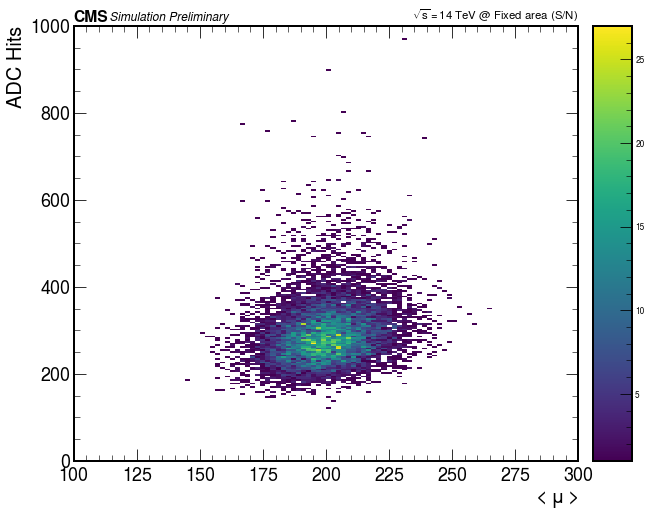

In [24]:
plot2DHist(h2_adchitsvspu, "", 
           xlabel="$<\mu>$", ylabel="ADC Hits", 
           #xmin_=0, xmax_=300, 
           ymin_=0, ymax_=1000, 
           output_file_name="h2_adchitsvspu")

# plot2DHist(h2_adchitsvspu, "ADC Hits TProfile", 
#            xlabel="$<\mu>$", ylabel="ADC Hits", 
#            xmin_=100, xmax_=300, 
#            ymin_=150, ymax_=3500, 
#            output_file_name="h2_adchitsvspu_norm", norm_=True)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5
 41.5 42.5 43.5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


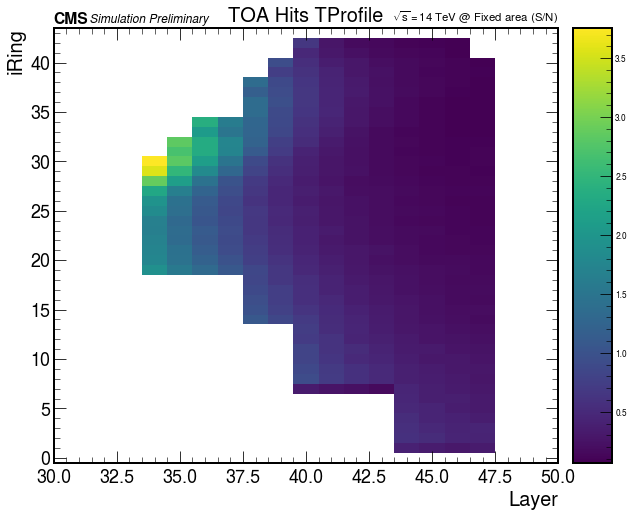

In [19]:
plot2DHist(h2_toacount, "TOA Hits TProfile", ylabel="iRing", 
           xmin_=30, xmax_=50, 
           output_file_name="h2_toacount")

# plot2DHist(h2_toacount, "TOA Hits TProfile", ylabel="iRing", 
#            xmin_=30, xmax_=50, 
#            output_file_name="h2_toacount_norm", norm_=True)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5
 41.5 42.5 43.5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


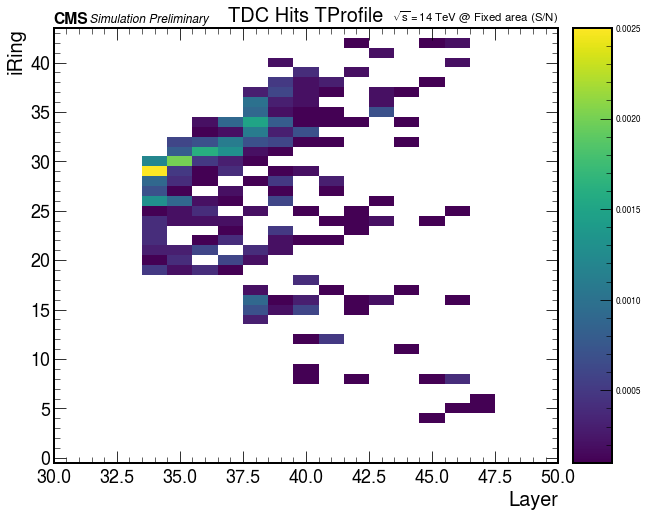

In [20]:
plot2DHist(h2_tdccount, "TDC Hits TProfile", ylabel="iRing", 
           xmin_=30, xmax_=50, 
           output_file_name="h2_tdccount")

# plot2DHist(h2_tdccount, "TDC Hits TProfile", ylabel="iRing", 
#            xmin_=30, xmax_=50, 
#            output_file_name="h2_tdccount_norm", norm_=True)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5
 41.5 42.5 43.5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


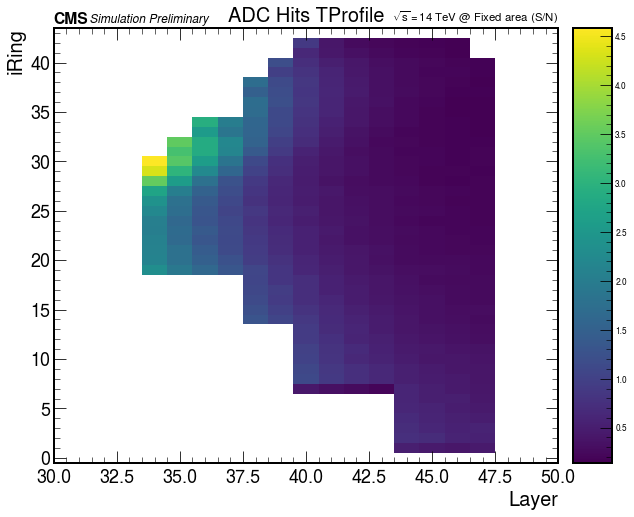

In [21]:
plot2DHist(h2_adccount, "ADC Hits TProfile", ylabel="iRing", 
           xmin_=30, xmax_=50, 
           output_file_name="h2_adccount")

# plot2DHist(h2_adccount, "ADC Hits TProfile", ylabel="iRing", 
#            xmin_=30, xmax_=50, 
#            output_file_name="h2_adccount_norm", norm_=True)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5
 41.5 42.5 43.5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


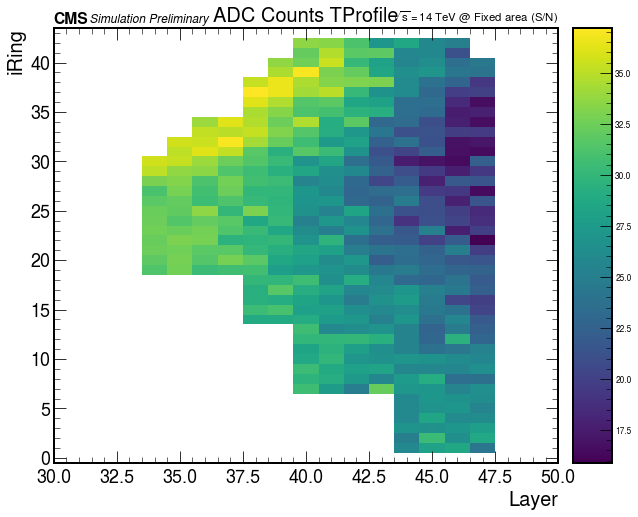

In [22]:
plot2DHist(h2_adcrawdata, "ADC Counts TProfile", ylabel="iRing", 
           xmin_=30, xmax_=50, 
           output_file_name="h2_adcrawdata")

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5
 41.5 42.5 43.5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


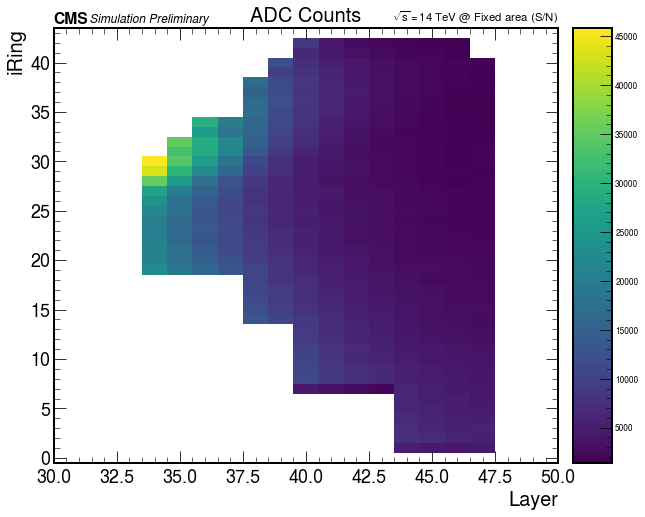

In [23]:
plot2DHist(h2_adcrawdata_entries, "ADC Counts", ylabel="iRing", 
           xmin_=30, xmax_=50, 
           output_file_name="h2_adcrawdata_entries")


# Profile histograms per layer 

In [26]:
with uproot.open(infile) as f:   
    hp_tdccount = f["ana/tdccount;1"]
    hp_toacount = f["ana/toacount;1"]
    hp_adccount = f["ana/adccount;1"]
    h_cellcount = f["ana/cellcount"]
    hlist_adcRawData = []
    hlist_names = []
    for i in range(34,48):
        name = "Layer"+str(i)+"_AdcRawData"
        hlist_names.append(name)
        hlist_adcRawData.append(f["ana/"+name])

In [27]:
def plotProfHist(h_, var_,label=None,output_file_name=None):
    
    # get info from hist 
    values = h_.values()
    edges = h_.axis('x').edges()
    print(edges)
    errors = h_.errors()

    #plot
    fig, ax = plt.subplots(figsize=(10, 8))
    hep.histplot(
        values,
        edges,
        yerr=True,
    )
    
#     # title
#     ax.set_title(
#        var_, #, L = 2.3 $fb^{-1}$; \n",
#        fontsize=20,
#     )

    # axes
    ax.set_ylabel(var_, fontsize=20)
    ax.set_xlabel("Layer", fontsize=20)
    ax.set_xlim(33, 48)
    #ax.set_ylim(0, 20)
    ax.tick_params(axis="both", labelsize=18) 

    # legend 
    #ax.legend(fontsize=15)
    
    # cms label
    hep.cms.label(
        "Preliminary",
        data=False,
        loc=0,
        ax=ax,
        rlabel="$\sqrt{s} = 14$ TeV "+simType,
        fontsize=16
    )
    
    # save output
    if output_file_name:
        plt.savefig(plot_dir+output_file_name+".pdf", bbox_inches="tight");



[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]


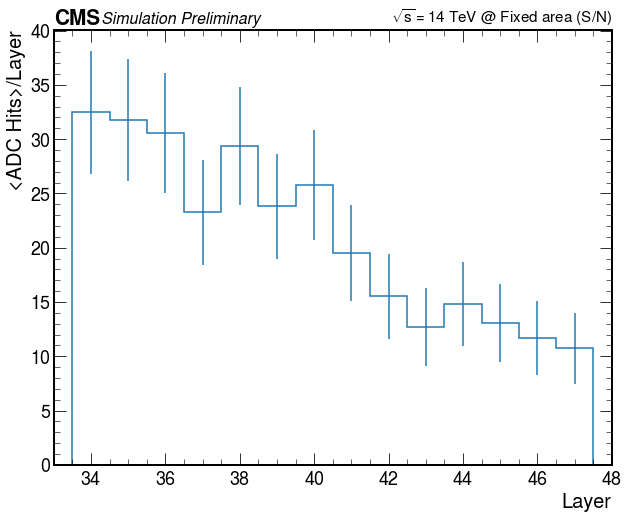

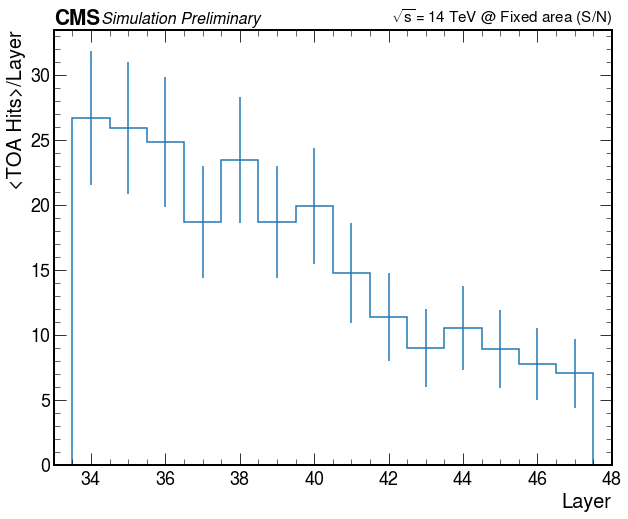

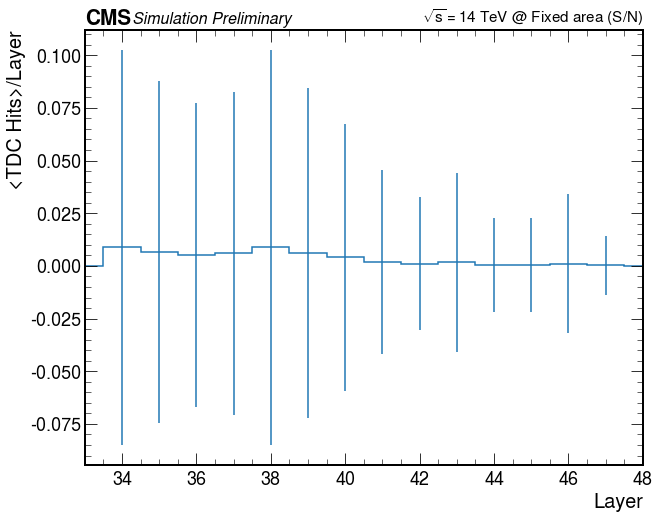

In [28]:
plotProfHist(hp_adccount, "<ADC Hits>/Layer",output_file_name="hp_adccount")
plotProfHist(hp_toacount, "<TOA Hits>/Layer",output_file_name="hp_toacount")
plotProfHist(hp_tdccount, "<TDC Hits>/Layer",output_file_name="hp_tdccount")
    

In [29]:
vals = hlist_adcRawData[0].values()
print(vals)
print(vals.sum())
print(len(df_tree))
vals * (len(df_tree)/vals.sum())

[    0.     0.     0.     0.     0.     0.     0.     0. 27925. 20395.
 18131. 16710. 16471. 15406. 14026. 13375. 11492.  9810.  9350.  8122.
  7036.  6989.  6062.  5576.  5453.  4834.  4596.  4383.  4054.  3888.
  3553.  3234.  3225.  2928.  2738.  2693.  2359.  2244.  2393.  2017.
  1891.  1981.  1755.  1735.  1587.  1470.  1622.  1441.  1316.  1302.
  1252.  1177.  1121.  1055.   996.  1034.   924.   887.   873.   855.
   801.   786.   713.   805.   686.   707.   679.   626.   533.   611.
   576.   553.   548.   481.   495.   508.   477.   444.   453.   408.
   425.   442.   365.   429.   420.   367.   383.   335.   396.   380.
   354.   345.   351.   328.   296.   302.   300.   278.   272.   263.]
306663.0
10000


array([  0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      , 910.60876 , 665.0623  ,
       591.23535 , 544.8978  , 537.10425 , 502.37558 , 457.37506 ,
       436.14655 , 374.74362 , 319.89514 , 304.89496 , 264.851   ,
       229.43753 , 227.9049  , 197.67628 , 181.82826 , 177.81735 ,
       157.63232 , 149.87137 , 142.92563 , 132.19724 , 126.78413 ,
       115.860085, 105.45779 , 105.16431 ,  95.47941 ,  89.283676,
        87.81627 ,  76.924835,  73.17479 ,  78.03355 ,  65.77253 ,
        61.663784,  64.5986  ,  57.228947,  56.576763,  51.75062 ,
        47.935356,  52.891937,  46.989693,  42.91356 ,  42.45703 ,
        40.826576,  38.380894,  36.554787,  34.402588,  32.47865 ,
        33.717796,  30.130796,  28.92426 ,  28.467733,  27.88077 ,
        26.119879,  25.630741,  23.250278,  26.250315,  22.369833,
        23.054625,  22.14157 ,  20.413288,  17.380644,  19.924152,
        18.782833,  18.032825,  17.86978 ,  15.684971,  16.141

In [30]:
def plot1DHistFromTH1(h_, xlabel_, ylabel_="A.U.",logY=False, title_=None,norm=False,xlim_min=None,xlim_max=None,density_=False,label=None,output_file_name=None):
    
    # get info from hist 
    values = h_.values()
    if norm:
        values = values * (len(df_tree)/values.sum())
        
    edges = h_.axis('x').edges()
    errors = h_.errors()
    
    if density_: ylabel_="A.U."

    #plot
    fig, ax = plt.subplots(figsize=(10, 8))

    hep.histplot(
        values,
        bins=edges,
        yerr=True,
        xerr=True,
        color="#FF6347",
        histtype='step',
        linewidth=2,
        density=density_
        #marker=".",
    )
    # title
    if title_:
        ax.set_title(
           title_, #, L = 2.3 $fb^{-1}$; \n",
           fontsize=20,
        )

    # axes
    ax.set_ylabel(ylabel_, fontsize=20)
    ax.set_xlabel(xlabel_, fontsize=20)
    if xlim_max: 
        if not xlim_min: xlim_min = 0
        ax.set_xlim(xlim_min, xlim_max)
    if not logY: ax.set_ylim(bottom=0)
    ax.tick_params(axis="both", labelsize=18) 
    ax.yaxis.offsetText.set_fontsize(16)
    #ax.get_yaxis().get_offset_text().set_x(-0.04)

    # legend 
    #ax.legend(fontsize=15)
    if logY: ax.set_yscale('log')
    
    # cms label
    hep.cms.label(
        "Preliminary",
        data=False, 
        loc=0,
        ax=ax,
        rlabel="$\sqrt{s} = 14$ TeV "+simType,
        fontsize=16
    )
    
    # save output
    if output_file_name:
        plt.savefig(plot_dir+output_file_name+".pdf", bbox_inches="tight");
    
    plt.close()


In [31]:
plot1DHistFromTH1(h_cellcount,"Layer", "ValidDetIDs/Layer",xlim_min=33,xlim_max=48,output_file_name="h_validDetId")


In [32]:
for h,hname in zip(hlist_adcRawData,hlist_names):
    print(hname)
#     plot1DHistFromTH1(h, "ADC Raw Data",
#                       xlim_min=0, xlim_max=40,
#                       density_=True, title_= (hname.split("_")[0]).replace('Layer','L'),
#                       output_file_name=hname+"_norm")
    
    plot1DHistFromTH1(h, "ADC Counts",
                      xlim_min=0, xlim_max=40, 
                      density_=False, title_= (hname.split("_")[0]).replace('Layer','L'),
                      output_file_name=hname)
    
    plot1DHistFromTH1(h, "ADC Counts",
                      xlim_min=0, xlim_max=100, 
                      density_=False, title_= (hname.split("_")[0]).replace('Layer','L'),
                      output_file_name=hname+"_logy", logY=True)

#     plot1DHistFromTH1(h, "ADC Raw Data",
#                       xlim_min=0, xlim_max=40, 
#                       density_=False, title_= (hname.split("_")[0]).replace('Layer','L'),
#                       output_file_name=hname+"_normNEvt", norm=True)

Layer34_AdcRawData
Layer35_AdcRawData
Layer36_AdcRawData
Layer37_AdcRawData
Layer38_AdcRawData
Layer39_AdcRawData
Layer40_AdcRawData
Layer41_AdcRawData
Layer42_AdcRawData
Layer43_AdcRawData
Layer44_AdcRawData
Layer45_AdcRawData
Layer46_AdcRawData
Layer47_AdcRawData


In [39]:
def plot1DHistListFromTH1(hlist_, legend_labels_, xlabel_, ylabel_="Counts",density_=False, xlim_min=None,xlim_max=None,logY=False,label=None,output_file_name=None):
    

    fig, ax = plt.subplots(figsize=(10, 8))
    if density_: ylabel_="A.U."
        

    for h_, label in zip(hlist_,legend_labels_):
        # get info from hist 
        values = h_.values()
        edges = h_.axis('x').edges()
        errors = h_.errors()

        hep.histplot(
            values,
            bins=edges,
            yerr=True,
            xerr=True,
            #color="#FF6347",
            histtype='step',
            linewidth=2,
            label=label,
            density=density_
        )
#     # title
#     ax.set_title(
#        var_, #, L = 2.3 $fb^{-1}$; \n",
#        fontsize=20,
#     )

    # axes
    ax.set_ylabel(ylabel_, fontsize=20)
    ax.set_xlabel(xlabel_, fontsize=20)
    if (xlim_min or xlim_min==0)  and xlim_max: ax.set_xlim(xlim_min, xlim_max)
    #ax.set_ylim(0, 20)
    ax.tick_params(axis="both", labelsize=18) 
    if logY: ax.set_yscale('log')

    # legend 
    ax.legend(fontsize=15)

    
    # cms label
    hep.cms.label(
        "Preliminary",
        data=False, 
        loc=0,
        ax=ax,
        rlabel="$\sqrt{s} = 14$ TeV "+simType,
        fontsize=16
    )
    
    # save output
    if output_file_name:
        plt.savefig(plot_dir+output_file_name+".pdf", bbox_inches="tight");

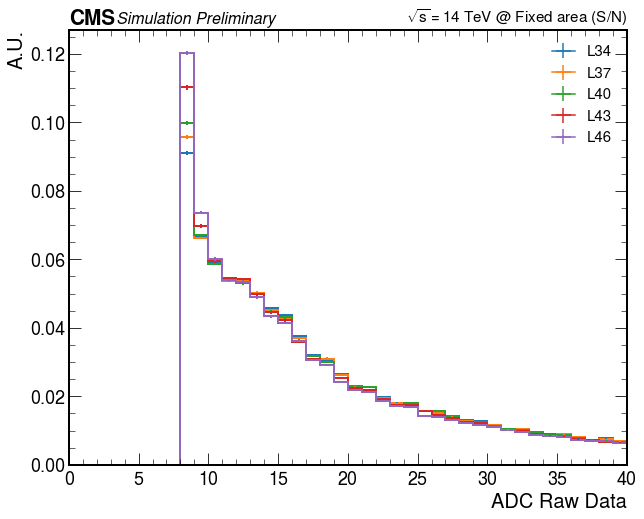

In [38]:
labels = ["L"+str(i) for i in range(34,48,3)]
plot1DHistListFromTH1(hlist_adcRawData,labels,"ADC Raw Data", 
                      density_=True, xlim_min=0, xlim_max=40,
                      output_file_name="LayersAdcRawData")


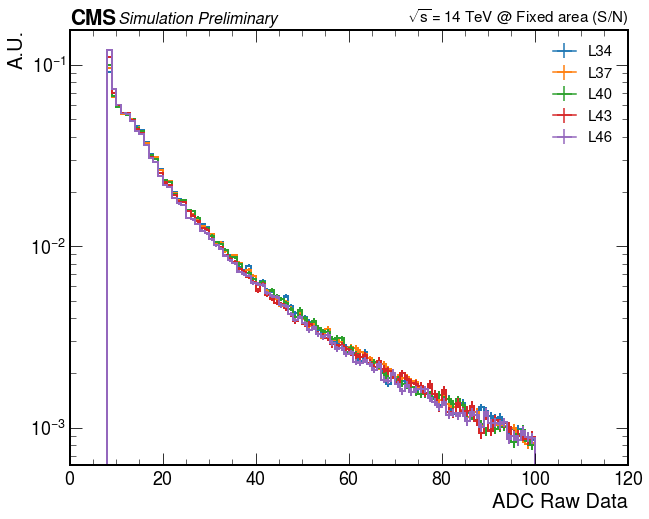

In [43]:
labels = ["L"+str(i) for i in range(34,48,3)]
plot1DHistListFromTH1(hlist_adcRawData,labels,"ADC Raw Data", 
                      density_=True, xlim_min=0, xlim_max=120,
                      output_file_name="LayersAdcRawData_logY", logY=True)

# Output to latex tables 

In [35]:
def custom_float_format(x):
    if x.is_integer():
        return f"{int(x)}"
    else:
        return f"{x:.3f}"
    
def fillLatexTable(df_, output_file_path, caption=None, title=None, header=True, doVertical=False):

    df_to_show = df_
    if doVertical:
        df_to_show = df_.T
        df_to_show.index = header
        header = True
    #print('df to output:')
    #print(df_to_show)
    
    with open(output_file_path+'.tex', 'w') as f:
        f.write("\\documentclass[a3paper]{article}\n")
        f.write("\\usepackage[a3paper,margin=1in,landscape]{geometry}\n")
        f.write("\\usepackage{caption}\n")
        f.write("\\usepackage{booktabs}\n")
        f.write("\\begin{document}\n")
        f.write("\\begin{table}\n")
        if caption:
            f.write("\\caption{"+caption+"}\n")
        if title:
            f.write("\\center{\\textbf{"+title+"}} \\\\ \n")
        f.write("\\centering\n")        
        latex_table =df_to_show.to_latex(index=True, header=header, float_format=custom_float_format)
        f.write(latex_table)
        f.write("\\end{table}\n")
        f.write("\\end{document}\n")

In [36]:
labels = {
    "toaHitsDiv36": "TOA Hits",
    "tdcHitsDiv36": "TDC Hits",
    "adcHitsDiv36": "ADC Hits",    
    "toaOcc": "TOA Occupancies",
    "tdcOcc": "TDC Occupancies",
    "adcOcc": "ADC Occupancies",
}


In [37]:
# Output occupancies and hits to latex table 

def makeTable(var_to_show):
    caption = labels[var_to_show] + " " + simType
    vars_to_print = []
    headers = [] # show only tb label as latex table header
    for tb in tileboards:
        tb_name = "L"+str(tb[0])+"_"+tb[1]   
        for ivar in labels.keys():
            if var_to_show in ivar:
                full_name = tb_name +"_"+ivar
                headers.append(tb_name)
                vars_to_print.append(full_name)

    print(len(vars_to_print))
    print(len(headers))
    fillLatexTable(df_tree[vars_to_print].describe(),
                   output_file_path=plot_dir+"texTable_"+var_to_show+".tex",
                   doVertical=True, header=headers,
                  title=caption)

makeTable('adcHitsDiv36')
makeTable('adcOcc')

52
52


/tmp/mmazza/ipykernel_46981/3563933462.py:29: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table =df_to_show.to_latex(index=True, header=header, float_format=custom_float_format)
/tmp/mmazza/ipykernel_46981/3563933462.py:29: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table =df_to_show.to_latex(index=True, header=header, float_format=custom_float_format)


52
52
